# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [105]:
path = "gdrive/MyDrive/SQL1/"

## 2. Import Packages

In [106]:
#import library yang di perlukan
import pandas as pd
import os 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import statistics


## 3. Connect SQLite to Python

In [107]:
conn = sqlite3.connect(path + 'Restaurant_Dataset.db')
cursor = conn.cursor()

In [108]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

[('Orders',), ('Customers',), ('Vendors',), ('Locations',)]


## 4. Data Preparation Using SQL

In [109]:
pd.read_sql_query("""
                    SELECT * 
                    FROM Customers
                  """, conn)

,customer_id,gender,dob,status,verified,created_at,updated_at
0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09
...,...,...,...,...,...,...,...
9763,369I4YD,female,2002,1,1,2020-03-03 12:03:03,2020-03-03 12:03:16
9764,VUOXW5K,female,1991,1,1,2020-03-03 12:17:09,2020-03-03 14:04:41
9765,H1S2T2Y,female,2001,1,1,2020-03-03 12:23:20,2020-03-03 12:24:20
9766,QGPCD5S,female,1996,1,1,2020-03-03 13:18:23,2020-03-03 13:18:39


In [110]:
pd.read_sql_query("""
                    SELECT * 
                    FROM Orders
                  """, conn)

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER
0,163241.0,9ZTJB1L,2.0,14.4,1,Yes,No,0.0,0.00,83,2019-08-01 05:31:33,0
1,163246.0,6C7D1O2,3.0,18.2,2,Yes,No,0.0,0.00,83,2019-08-01 05:37:05,0
2,163265.0,VCBBSUB,1.0,4.6,1,Yes,No,0.0,0.00,78,2019-08-01 06:03:59,0
3,163274.0,ZBNP36W,1.0,5.7,1,Yes,No,0.0,0.00,195,2019-08-01 06:34:38,0
4,163321.0,BJ1GYQY,2.0,15.8,1,Yes,No,0.0,0.00,75,2019-08-01 17:06:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9763,415158.0,68KNG50,2.0,28.1,1,No,No,0.0,12.03,356,2020-02-29 22:17:02,0
9764,415165.0,E4G7O87,1.0,5.4,2,No,No,0.0,6.88,401,2020-02-29 22:17:22,0
9765,415198.0,BAOSFJQ,1.0,5.4,4,No,No,0.0,8.89,160,2020-02-29 22:23:59,0
9766,415310.0,89BFAER,4.0,16.9,2,No,No,0.0,4.82,79,2020-02-29 22:45:28,2


In [111]:
pd.read_sql_query("""
                    SELECT * 
                    FROM Vendors
                  """, conn)

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type
0,4,118597.0,-0.588596,0.754434,Restaurants,0.0,6.0,1.0,11:00AM-11:30PM,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,3
1,13,118608.0,-0.471654,0.744470,Restaurants,0.7,5.0,1.0,08:30AM-10:30PM,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03,3
2,20,118616.0,-0.407527,0.643681,Restaurants,0.0,8.0,1.0,08:00AM-10:45PM,19,0.0,1.0,1,1,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55,3
3,23,118619.0,-0.585385,0.753811,Restaurants,0.0,5.0,1.0,10:59AM-10:30PM,16,0.0,1.0,1,11,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17,3
4,28,118624.0,0.480602,0.552850,Restaurants,0.7,15.0,1.0,11:00AM-11:45PM,10,0.0,1.0,1,11,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,0.0,10.0,1.0,None,10,0.0,1.0,1,1,4.1,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 12:47:39,2020-04-07 20:01:33,3
96,855,130463.0,2.145206,0.745025,Restaurants,0.0,8.0,1.0,None,10,0.0,1.0,1,1,4.2,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",2019-12-21 13:02:32,2020-04-07 01:50:41,3
97,856,130464.0,0.251469,0.483632,Restaurants,0.0,7.0,1.0,None,10,0.0,1.0,1,11,4.3,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:04:34,2020-04-06 23:53:16,3
98,858,130468.0,0.019817,0.587087,Restaurants,0.0,3.0,1.0,None,10,0.0,1.0,1,11,4.2,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:12:09,2020-04-07 14:26:08,3


In [112]:
pd.read_sql_query("""
                    SELECT * 
                    FROM Locations
                  """, conn)

,customer_id,location_number,latitude,longitude
0,QINKB6H,0,126.032278,-9.106019
1,EQ4S6SE,0,0.278709,-78.623847
2,4673534,1,0.124485,-78.605621
3,OQA6IMF,2,-0.113891,-78.577449
4,9NQE2MO,3,-0.848796,0.136726
...,...,...,...,...
16715,X6XDZT9,4,-0.197722,0.609199
16716,QAPWL29,5,-0.343042,0.626064
16717,PTQBI4B,0,-0.974907,-0.177863
16718,F3678MD,0,1.058539,0.001628


In [113]:
data_customer = pd.read_sql_query('select * from Customers',conn)
data_orders = pd.read_sql_query('select * from Orders',conn)
data_vendors = pd.read_sql_query('select * from Vendors',conn)
data_lokasi = pd.read_sql_query('select * from Locations',conn)

## 5. Problem Statement

1.   Bagaimana Cara Agar Konsumen lebih tertarget
2.   Pusat akan menstop suplai kepada vendor yang sudah tidak bisa melanjutkan bisnisnya lagi
3.   menaawarkan produk rekomendasi kepada customer untuk meningkatkan pendapatan

## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

Data Understanding (Data_customers)

1.   Customer_id : Identitas unik customer, digunakan untuk mengakses data locations **(string)**
2.   Gender : Jenis kelamin customer **(string)**
1.   Dob : Tahun Lahir **(int)**
2.   Status and verived : Status Akun (1 = aktif) dan (0 = tidak aktif) **(float)**
1. created_at and updatetd_at : waktu ketika akun dibuat dan diupdate **(datetime)**

In [114]:
data_customer

,customer_id,gender,dob,status,verified,created_at,updated_at
0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09
...,...,...,...,...,...,...,...
9763,369I4YD,female,2002,1,1,2020-03-03 12:03:03,2020-03-03 12:03:16
9764,VUOXW5K,female,1991,1,1,2020-03-03 12:17:09,2020-03-03 14:04:41
9765,H1S2T2Y,female,2001,1,1,2020-03-03 12:23:20,2020-03-03 12:24:20
9766,QGPCD5S,female,1996,1,1,2020-03-03 13:18:23,2020-03-03 13:18:39


In [115]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768 entries, 0 to 9767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  9768 non-null   object
 1   gender       9768 non-null   object
 2   dob          9768 non-null   int64 
 3   status       9768 non-null   int64 
 4   verified     9768 non-null   int64 
 5   created_at   9768 non-null   object
 6   updated_at   9768 non-null   object
dtypes: int64(3), object(4)
memory usage: 534.3+ KB


In [116]:
#mengganti Tipe data
ganti = ['created_at','updated_at',]
for i in ganti:
  data_customer[i] = pd.to_datetime(data_customer[i])

In [117]:
data_customer.rename(columns = {'dob':'year_of_birth'}, inplace = True)
data_customer

,customer_id,gender,year_of_birth,status,verified,created_at,updated_at
0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09
...,...,...,...,...,...,...,...
9763,369I4YD,female,2002,1,1,2020-03-03 12:03:03,2020-03-03 12:03:16
9764,VUOXW5K,female,1991,1,1,2020-03-03 12:17:09,2020-03-03 14:04:41
9765,H1S2T2Y,female,2001,1,1,2020-03-03 12:23:20,2020-03-03 12:24:20
9766,QGPCD5S,female,1996,1,1,2020-03-03 13:18:23,2020-03-03 13:18:39


In [118]:
data_customer.isnull().sum()

customer_id      0
gender           0
year_of_birth    0
status           0
verified         0
created_at       0
updated_at       0
dtype: int64

In [119]:
data_customer.duplicated(subset=['customer_id'])

0       False
1       False
2       False
3       False
4       False
        ...  
9763    False
9764    False
9765    False
9766    False
9767    False
Length: 9768, dtype: bool

**Data Order**
1. Order_id : Identitas unik pesanan
2. Customer_id :Identitas unik customer (digunakan untuk menghubungkan dataset customer)
3.Item_count :Banyaknya item yang dipesan
4.Grand_total:Total biaya
5.Payment_mode:Metode pembayaran (kategorik)
6.Is_favorit:Item favorit dari vendor
7.Is_rated:Item yang dinilai
8.Driver_rating:Rating pengemudi
9.Deliverydistance:Jarak pengiriman
10.created_at:Waktu pemesanan
11.vendor_id: Identitas unik vendor
12.Location_number: Nomor lokasi menentukan lokasi customer mana yang menjadi tujuan pengiriman 

In [120]:
data_orders = pd.read_sql_query('select * from Orders',conn)
data_orders

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER
0,163241.0,9ZTJB1L,2.0,14.4,1,Yes,No,0.0,0.00,83,2019-08-01 05:31:33,0
1,163246.0,6C7D1O2,3.0,18.2,2,Yes,No,0.0,0.00,83,2019-08-01 05:37:05,0
2,163265.0,VCBBSUB,1.0,4.6,1,Yes,No,0.0,0.00,78,2019-08-01 06:03:59,0
3,163274.0,ZBNP36W,1.0,5.7,1,Yes,No,0.0,0.00,195,2019-08-01 06:34:38,0
4,163321.0,BJ1GYQY,2.0,15.8,1,Yes,No,0.0,0.00,75,2019-08-01 17:06:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9763,415158.0,68KNG50,2.0,28.1,1,No,No,0.0,12.03,356,2020-02-29 22:17:02,0
9764,415165.0,E4G7O87,1.0,5.4,2,No,No,0.0,6.88,401,2020-02-29 22:17:22,0
9765,415198.0,BAOSFJQ,1.0,5.4,4,No,No,0.0,8.89,160,2020-02-29 22:23:59,0
9766,415310.0,89BFAER,4.0,16.9,2,No,No,0.0,4.82,79,2020-02-29 22:45:28,2


In [121]:
data_orders = data_orders.drop(['driver_rating','deliverydistance'], axis = 1)

In [122]:
data_orders

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,vendor_id,created_at,LOCATION_NUMBER
0,163241.0,9ZTJB1L,2.0,14.4,1,Yes,No,83,2019-08-01 05:31:33,0
1,163246.0,6C7D1O2,3.0,18.2,2,Yes,No,83,2019-08-01 05:37:05,0
2,163265.0,VCBBSUB,1.0,4.6,1,Yes,No,78,2019-08-01 06:03:59,0
3,163274.0,ZBNP36W,1.0,5.7,1,Yes,No,195,2019-08-01 06:34:38,0
4,163321.0,BJ1GYQY,2.0,15.8,1,Yes,No,75,2019-08-01 17:06:17,0
...,...,...,...,...,...,...,...,...,...,...
9763,415158.0,68KNG50,2.0,28.1,1,No,No,356,2020-02-29 22:17:02,0
9764,415165.0,E4G7O87,1.0,5.4,2,No,No,401,2020-02-29 22:17:22,0
9765,415198.0,BAOSFJQ,1.0,5.4,4,No,No,160,2020-02-29 22:23:59,0
9766,415310.0,89BFAER,4.0,16.9,2,No,No,79,2020-02-29 22:45:28,2


In [123]:
data_orders.duplicated().any()

False

In [124]:
data_orders.isnull().sum()

order_id             4
customer_id          0
item_count         507
grand_total          0
payment_mode         0
is_favorite        100
is_rated             0
vendor_id            0
created_at           0
LOCATION_NUMBER      0
dtype: int64

In [125]:
#hapus missing value pada kolom order
data_orders = data_orders.dropna(subset=['order_id'],axis=0)
data_orders.isnull().sum()

order_id             0
customer_id          0
item_count         507
grand_total          0
payment_mode         0
is_favorite        100
is_rated             0
vendor_id            0
created_at           0
LOCATION_NUMBER      0
dtype: int64

In [126]:
#mengisi missing value dengan mean pada kolom item_count
mean = data_orders['item_count'].mean()
data_orders['item_count'] = data_orders['item_count'].fillna(mean)
data_orders.isnull().sum()

<ipython-input-126-58572f4d92b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['item_count'] = data_orders['item_count'].fillna(mean)


order_id             0
customer_id          0
item_count           0
grand_total          0
payment_mode         0
is_favorite        100
is_rated             0
vendor_id            0
created_at           0
LOCATION_NUMBER      0
dtype: int64

In [127]:
#merubah tipe data
data_orders['item_count'] = data_orders['item_count'].astype(int)

<ipython-input-127-6d34d7e46986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['item_count'] = data_orders['item_count'].astype(int)


In [128]:
#mengisi missing value dengan modus pada kolom is_favorite
modus = data_orders['is_favorite'].mode()[0]
data_orders['is_favorite'] = data_orders['is_favorite'].fillna(modus)
data_orders.isnull().sum()

<ipython-input-128-3ba7c1448569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['is_favorite'] = data_orders['is_favorite'].fillna(modus)


order_id           0
customer_id        0
item_count         0
grand_total        0
payment_mode       0
is_favorite        0
is_rated           0
vendor_id          0
created_at         0
LOCATION_NUMBER    0
dtype: int64

In [129]:
#merubah tipe data
data_orders['order_id'] = data_orders['order_id'].astype(str)
data_orders['vendor_id'] = data_orders['vendor_id'].astype(str)
data_orders['created_at'] = pd.to_datetime(data_orders['created_at'])

<ipython-input-129-5cf987c76411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['order_id'] = data_orders['order_id'].astype(str)
<ipython-input-129-5cf987c76411>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['vendor_id'] = data_orders['vendor_id'].astype(str)
<ipython-input-129-5cf987c76411>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [130]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9764 entries, 0 to 9767
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         9764 non-null   object        
 1   customer_id      9764 non-null   object        
 2   item_count       9764 non-null   int64         
 3   grand_total      9764 non-null   float64       
 4   payment_mode     9764 non-null   int64         
 5   is_favorite      9764 non-null   object        
 6   is_rated         9764 non-null   object        
 7   vendor_id        9764 non-null   object        
 8   created_at       9764 non-null   datetime64[ns]
 9   LOCATION_NUMBER  9764 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 839.1+ KB


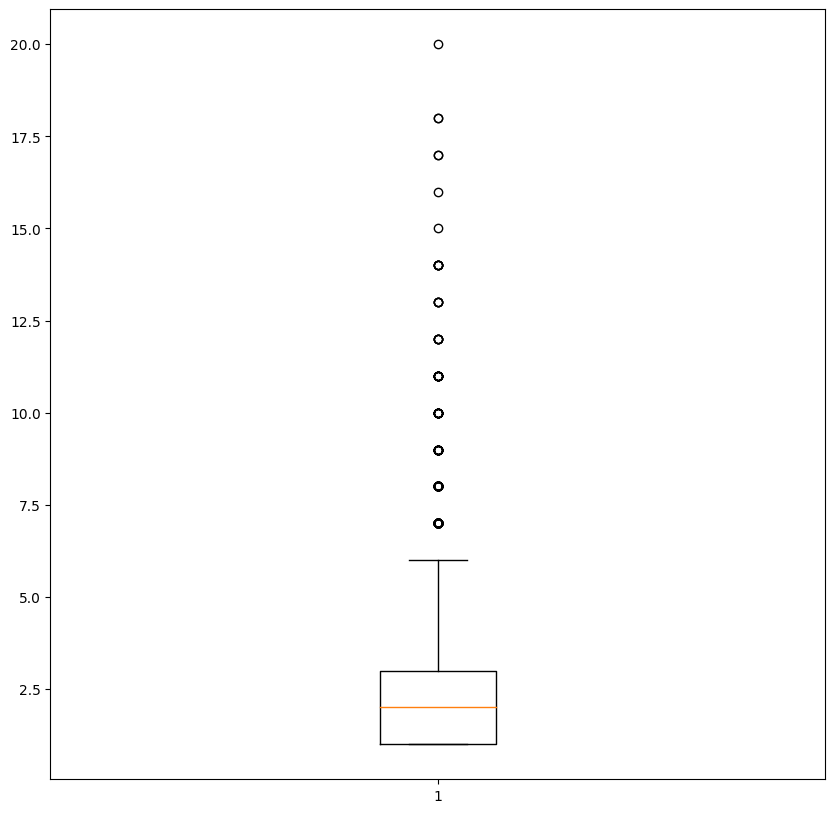

In [131]:
#cek outlier dengan boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_orders["item_count"])
plt.show()

In [132]:
#cek outlier dengan IQR
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data_orders['item_count'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 16, 17, 17, 18, 18, 20]


In [133]:
# Trimming
Q1 = data_orders['item_count'].quantile(0.10)
Q3 = data_orders['item_count'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=data_orders['item_count'][(data_orders['item_count']>upper_whisker)|(data_orders['item_count']<lower_whisker)].index
data_orders.drop(index,inplace=True)

<ipython-input-133-6f1e316f7cae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders.drop(index,inplace=True)


<ipython-input-134-e14203b4182b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders[outliers] = np.nan
<ipython-input-134-e14203b4182b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['item_count'].fillna(median, inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1432a30a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1432a30f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1432a30760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1432a31480>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1432a31720>],
 'means': []}

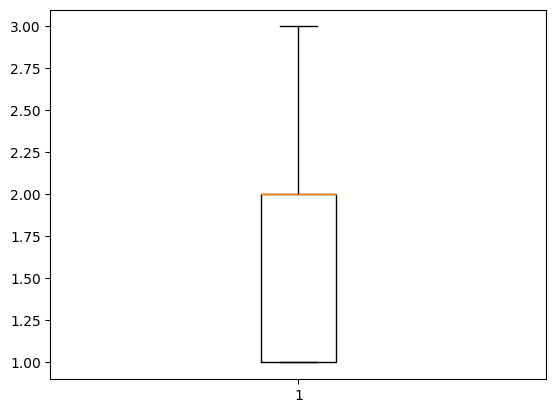

In [134]:
median = data_orders['item_count'].median()
std = data_orders['item_count'].std()
outliers = (data_orders['item_count']-median).abs() > std
data_orders[outliers] = np.nan
data_orders['item_count'].fillna(median, inplace=True)
plt.boxplot(data_orders['item_count'], data=data_orders)


**Data Lokasi**
1. Customer_id : Identitas unik customer
2. Location_number : Nomor lokasi (kebanyakan customer memiliki nomor satu atau dua)
3.latitude and longitude : Menunjukkan lokasi (bukan lokasi sebenarnya karena lokasi telah disamarkan)

In [135]:
data_lokasi = pd.read_sql_query('select * from Locations',conn)
data_lokasi

,customer_id,location_number,latitude,longitude
0,QINKB6H,0,126.032278,-9.106019
1,EQ4S6SE,0,0.278709,-78.623847
2,4673534,1,0.124485,-78.605621
3,OQA6IMF,2,-0.113891,-78.577449
4,9NQE2MO,3,-0.848796,0.136726
...,...,...,...,...
16715,X6XDZT9,4,-0.197722,0.609199
16716,QAPWL29,5,-0.343042,0.626064
16717,PTQBI4B,0,-0.974907,-0.177863
16718,F3678MD,0,1.058539,0.001628


In [136]:
data_lokasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      16720 non-null  object 
 1   location_number  16720 non-null  int64  
 2   latitude         16717 non-null  float64
 3   longitude        16717 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 522.6+ KB


In [137]:
#cek missing value
data_lokasi.isnull().sum()

customer_id        0
location_number    0
latitude           3
longitude          3
dtype: int64

In [138]:
#menghapus missing value
data_lokasi = data_lokasi.dropna(subset=['latitude','longitude'],axis=0)

In [139]:
#cek duplikat pada data
data_lokasi.duplicated().any()

False

In [140]:
data_lokasi.nunique()

customer_id         8042
location_number       12
latitude           16608
longitude          16619
dtype: int64

**Data Vendor**
1. id	:Identitas unik vendor
2. authentication_id"	Identitas otentikasi
3. latitude	:Lokasi pelanggan (garis lintang)
4. longitude:	Lokasi pelanggan (garis bujur)
5. vendor_category_en	:ategori vendor (Restaurants dan Sweets & Bakes)
6. delivery_charge	:Biaya pengiriman
7. serving_distance	:Jarak pelayanan
8. is_open	: -
9.OpeningTime	:Waktu buka
10.prepration_time:	Waktu persiapan (menit)
11.discount_percentage:	Persentase diskon
12.status	-
13.veariﬁed	-
14.rank	-
15.vendor_rating	Rating dari vendor skala (0 s/d 5)
16.vendor_tag	Menunjukkan label dari vendor
17.vendor_tag_name	Menunjukkan nama label vendor
18.created_at	Waktu dibuat
19.updated_at	Waktu diupdate
20.device_type	Tipe device yg digunakan


In [141]:
data_vendors = pd.read_sql_query('select * from Vendors',conn)
data_vendors

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type
0,4,118597.0,-0.588596,0.754434,Restaurants,0.0,6.0,1.0,11:00AM-11:30PM,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,3
1,13,118608.0,-0.471654,0.744470,Restaurants,0.7,5.0,1.0,08:30AM-10:30PM,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03,3
2,20,118616.0,-0.407527,0.643681,Restaurants,0.0,8.0,1.0,08:00AM-10:45PM,19,0.0,1.0,1,1,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55,3
3,23,118619.0,-0.585385,0.753811,Restaurants,0.0,5.0,1.0,10:59AM-10:30PM,16,0.0,1.0,1,11,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17,3
4,28,118624.0,0.480602,0.552850,Restaurants,0.7,15.0,1.0,11:00AM-11:45PM,10,0.0,1.0,1,11,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,0.0,10.0,1.0,None,10,0.0,1.0,1,1,4.1,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 12:47:39,2020-04-07 20:01:33,3
96,855,130463.0,2.145206,0.745025,Restaurants,0.0,8.0,1.0,None,10,0.0,1.0,1,1,4.2,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",2019-12-21 13:02:32,2020-04-07 01:50:41,3
97,856,130464.0,0.251469,0.483632,Restaurants,0.0,7.0,1.0,None,10,0.0,1.0,1,11,4.3,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:04:34,2020-04-06 23:53:16,3
98,858,130468.0,0.019817,0.587087,Restaurants,0.0,3.0,1.0,None,10,0.0,1.0,1,11,4.2,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:12:09,2020-04-07 14:26:08,3


In [142]:
data_vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            100 non-null    int64  
 1   authentication_id    100 non-null    float64
 2   latitude             100 non-null    float64
 3   longitude            100 non-null    float64
 4   vendor_category_en   100 non-null    object 
 5   delivery_charge      100 non-null    float64
 6   serving_distance     100 non-null    float64
 7   is_open              100 non-null    float64
 8   OpeningTime          91 non-null     object 
 9   prepration_time      100 non-null    int64  
 10  discount_percentage  100 non-null    float64
 11  status               100 non-null    float64
 12  verified             100 non-null    int64  
 13  rank                 100 non-null    int64  
 14  vendor_rating        100 non-null    float64
 15  vendor_tag           97 non-null     obje

In [143]:
#merubah tipe data
ganti = ['created_at','updated_at',]
for i in ganti:
  data_vendors[i] = pd.to_datetime(data_vendors[i])

In [144]:
#merubah tipe data
data_vendors['vendor_id'] = data_vendors['vendor_id'].astype(str)
data_vendors['authentication_id'] = data_vendors['authentication_id'].astype(str)

In [145]:
data_vendors = data_vendors.drop(['delivery_charge','serving_distance','is_open','status','verified','rank','device_type'], axis = 1)
data_vendors.head()

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,OpeningTime,prepration_time,discount_percentage,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at
0,4,118597.0,-0.588596,0.754434,Restaurants,11:00AM-11:30PM,15,0.0,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43
1,13,118608.0,-0.471654,0.744470,Restaurants,08:30AM-10:30PM,14,0.0,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03
2,20,118616.0,-0.407527,0.643681,Restaurants,08:00AM-10:45PM,19,0.0,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55
3,23,118619.0,-0.585385,0.753811,Restaurants,10:59AM-10:30PM,16,0.0,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17
4,28,118624.0,0.480602,0.552850,Restaurants,11:00AM-11:45PM,10,0.0,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41


In [146]:
data_vendors.duplicated().any()

False

In [147]:
data_vendors = data_vendors.dropna(subset=['OpeningTime','vendor_tag','vendor_tag_name'],axis=0)
data_vendors.isnull().sum()

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
OpeningTime            0
prepration_time        0
discount_percentage    0
vendor_rating          0
vendor_tag             0
vendor_tag_name        0
created_at             0
updated_at             0
dtype: int64

In [148]:
#Data siap Olah
data_customer.to_csv(path+'data_customer_siap1.csv')
data_orders.to_csv(path+'data_orders_siap1.csv')
data_vendors.to_csv(path+'data_vendors_siap1.csv')
data_lokasi.to_csv(path+'data_lokasi_siap1.csv')

In [149]:
#Data siap Olah
data_customer.to_excel(path+'data_customer_siap1.xlsx')
data_orders.to_excel(path+'data_orders_siap1.xlsx')
data_vendors.to_excel(path+'data_vendors_siap1.xlsx')
data_lokasi.to_excel(path+'data_lokasi_siap1.xlsx')

## 7. Exploratory Data Analysis & Visualization

In [150]:
#deklarasi variabel
customer = pd.read_csv(path +'data_customer_siap1.csv')
order = pd.read_csv(path + 'data_orders_siap1.csv')
vendor = pd.read_csv(path +'data_vendors_siap1.csv')
lokasi = pd.read_csv(path + 'data_lokasi_siap1.csv')

In [151]:
customer

,Unnamed: 0,customer_id,gender,year_of_birth,status,verified,created_at,updated_at
0,0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09
...,...,...,...,...,...,...,...,...
9763,9763,369I4YD,female,2002,1,1,2020-03-03 12:03:03,2020-03-03 12:03:16
9764,9764,VUOXW5K,female,1991,1,1,2020-03-03 12:17:09,2020-03-03 14:04:41
9765,9765,H1S2T2Y,female,2001,1,1,2020-03-03 12:23:20,2020-03-03 12:24:20
9766,9766,QGPCD5S,female,1996,1,1,2020-03-03 13:18:23,2020-03-03 13:18:39


In [152]:
#mencari umur customer
now = dt.now()
customer['age'] = now.year - customer['year_of_birth']

In [153]:
#membuat fungsi untuk menentukan kelompok usia
def kelompokusia (age):
    if age >= 65:
        return 'lanjut usia'
    elif age >= 45:
        return 'dewasa'
    else:
        return 'pemuda'
customer['kelompok_usia'] = customer['age'].apply(kelompokusia)

In [154]:
#fungsi status customer
def statusnya (status):
    if status == 1:
        return 'aktif'
    else:
        return 'tidak aktif'
#fungsi customer terverifikasi
def verifikasinya (verified):
    if verified == 1:
        return 'verifikasi'
    else:
        return 'tidak verifikasi'
customer['status_customer'] = customer['status'].apply(statusnya)
customer['verifikasi_customer'] = customer['verified'].apply(verifikasinya)
customer


,Unnamed: 0,customer_id,gender,year_of_birth,status,verified,created_at,updated_at,age,kelompok_usia,status_customer,verifikasi_customer
0,0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36,17,pemuda,aktif,verifikasi
1,1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47,16,pemuda,aktif,verifikasi
2,2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15,31,pemuda,aktif,verifikasi
3,3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52,24,pemuda,aktif,verifikasi
4,4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09,26,pemuda,aktif,verifikasi
...,...,...,...,...,...,...,...,...,...,...,...,...
9763,9763,369I4YD,female,2002,1,1,2020-03-03 12:03:03,2020-03-03 12:03:16,21,pemuda,aktif,verifikasi
9764,9764,VUOXW5K,female,1991,1,1,2020-03-03 12:17:09,2020-03-03 14:04:41,32,pemuda,aktif,verifikasi
9765,9765,H1S2T2Y,female,2001,1,1,2020-03-03 12:23:20,2020-03-03 12:24:20,22,pemuda,aktif,verifikasi
9766,9766,QGPCD5S,female,1996,1,1,2020-03-03 13:18:23,2020-03-03 13:18:39,27,pemuda,aktif,verifikasi


In [155]:
#menggabungkan tabel order dan vendor
cust_order= pd.merge(
    left=customer,
    right=order,
    how = 'outer',
    indicator = True,
    left_on='customer_id',
    right_on = 'customer_id'
)
cust_order

,Unnamed: 0_x,customer_id,gender,year_of_birth,status,verified,created_at_x,updated_at,age,kelompok_usia,...,order_id,item_count,grand_total,payment_mode,is_favorite,is_rated,vendor_id,created_at_y,LOCATION_NUMBER,_merge
0,0.0,ICE2DJP,male,2006.0,1.0,1.0,2018-02-07 16:45:36,2018-02-07 16:45:36,17.0,pemuda,...,144990.0,1.0,6.0,1.0,Yes,No,154.0,2019-07-03 19:13:35,1.0,both
1,0.0,ICE2DJP,male,2006.0,1.0,1.0,2018-02-07 16:45:36,2018-02-07 16:45:36,17.0,pemuda,...,380124.0,1.0,7.8,2.0,No,No,295.0,2020-02-12 10:04:58,0.0,both
2,1.0,FWNUI71,male,2007.0,1.0,1.0,2018-03-22 20:11:47,2018-03-22 20:11:47,16.0,pemuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2.0,LRX7BCH,male,1992.0,1.0,1.0,2018-04-17 20:01:15,2018-04-17 20:01:15,31.0,pemuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,3.0,D96DHMD,male,1999.0,1.0,1.0,2018-04-29 22:35:52,2018-04-29 22:35:52,24.0,pemuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
13938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
13939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
13940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


In [156]:
#filtering data
both = cust_order['_merge'].isin(['both'])
filter = cust_order['status_customer'].isin(['aktif'])

In [157]:
cust_order =  cust_order[both & filter]
cust_order.isnull().sum()

Unnamed: 0_x           0
customer_id            0
gender                 0
year_of_birth          0
status                 0
verified               0
created_at_x           0
updated_at             0
age                    0
kelompok_usia          0
status_customer        0
verifikasi_customer    0
Unnamed: 0_y           0
order_id               0
item_count             0
grand_total            0
payment_mode           0
is_favorite            0
is_rated               0
vendor_id              0
created_at_y           0
LOCATION_NUMBER        0
_merge                 0
dtype: int64

In [158]:
#gabungkan nilai cust_order_dan vendor
cust_order_vendor =  pd.merge(
    left=cust_order,
    right=vendor,
    how = 'right',
    left_on='vendor_id',
    right_on = 'vendor_id'
)

In [171]:
print(cust_order_vendor.corr())

                     Unnamed: 0_x  year_of_birth  status  verified       age  \
Unnamed: 0_x             1.000000      -0.007035     NaN -0.220987  0.007035   
year_of_birth           -0.007035       1.000000     NaN -0.002820 -1.000000   
status                        NaN            NaN     NaN       NaN       NaN   
verified                -0.220987      -0.002820     NaN  1.000000  0.002820   
age                      0.007035      -1.000000     NaN  0.002820  1.000000   
Unnamed: 0_y             0.003119       0.005583     NaN  0.013943 -0.005583   
order_id                -0.001534       0.001266     NaN  0.008669 -0.001266   
item_count              -0.025054       0.017517     NaN -0.001666 -0.017517   
grand_total             -0.022878       0.013494     NaN  0.001130 -0.013494   
payment_mode            -0.002752      -0.006300     NaN  0.015568  0.006300   
LOCATION_NUMBER          0.015805      -0.008244     NaN  0.006357  0.008244   
Unnamed: 0               0.012422      -

<ipython-input-171-cb102903d7e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cust_order_vendor.corr())


In [160]:
cust_order_vendor['revenue'] = cust_order_vendor.item_count * cust_order_vendor.grand_total
with pd.option_context('display.max_columns', None):
    display(cust_order_vendor)

,Unnamed: 0_x,customer_id,gender,year_of_birth,status,verified,created_at_x,updated_at_x,age,kelompok_usia,status_customer,verifikasi_customer,Unnamed: 0_y,order_id,item_count,grand_total,payment_mode,is_favorite,is_rated,vendor_id,created_at_y,LOCATION_NUMBER,_merge,Unnamed: 0,authentication_id,latitude,longitude,vendor_category_en,OpeningTime,prepration_time,discount_percentage,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at_y,revenue
0,185.0,Q2RTENU,male,1994.0,1.0,1.0,2018-06-30 16:26:37,2018-06-30 16:26:37,29.0,pemuda,aktif,verifikasi,2849.0,204586.0,2.0,26.6,4.0,No,No,4.0,2019-10-02 02:25:49,0.0,both,0,118597.0,-0.588596,0.754434,Restaurants,11:00AM-11:30PM,15,0.0,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,53.2
1,200.0,ZTM3WSF,female,1994.0,1.0,1.0,2018-07-04 00:53:13,2020-02-23 19:58:31,29.0,pemuda,aktif,verifikasi,6052.0,298797.0,3.0,14.4,1.0,No,Yes,4.0,2019-12-16 11:37:07,1.0,both,0,118597.0,-0.588596,0.754434,Restaurants,11:00AM-11:30PM,15,0.0,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,43.2
2,285.0,4W64ZKW,male,2001.0,1.0,1.0,2018-08-11 22:02:42,2018-08-11 22:02:41,22.0,pemuda,aktif,verifikasi,2600.0,199730.0,2.0,26.9,2.0,No,Yes,4.0,2019-09-27 23:02:56,1.0,both,0,118597.0,-0.588596,0.754434,Restaurants,11:00AM-11:30PM,15,0.0,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,53.8
3,364.0,0TGC4OY,male,2004.0,1.0,1.0,2018-09-09 03:22:59,2018-09-09 03:22:59,19.0,pemuda,aktif,verifikasi,9560.0,407718.0,3.0,15.0,2.0,No,No,4.0,2020-02-26 13:38:51,0.0,both,0,118597.0,-0.588596,0.754434,Restaurants,11:00AM-11:30PM,15,0.0,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,45.0
4,396.0,4WO5AAJ,male,2004.0,1.0,1.0,2018-09-15 21:13:16,2018-09-15 21:13:15,19.0,pemuda,aktif,verifikasi,1100.0,196110.0,2.0,13.9,2.0,Yes,No,4.0,2019-09-18 18:33:09,0.0,both,0,118597.0,-0.588596,0.754434,Restaurants,11:00AM-11:30PM,15,0.0,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,27.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7527,8829.0,QHDU1L4,female,1996.0,1.0,1.0,2020-02-07 01:28:19,2020-02-07 01:28:28,27.0,pemuda,aktif,verifikasi,6179.0,302150.0,1.0,9.0,1.0,No,No,681.0,2019-12-18 20:36:40,0.0,both,90,124250.0,-0.595325,0.095639,Restaurants,9-22,10,0.0,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",2019-11-18 08:07:10,2020-04-07 17:40:41,9.0
7528,8886.0,J0R4ZII,female,1990.0,1.0,1.0,2020-02-08 00:18:35,2020-02-18 23:59:39,33.0,pemuda,aktif,verifikasi,9729.0,414004.0,2.0,19.8,4.0,No,No,681.0,2020-02-29 14:30:48,4.0,both,90,124250.0,-0.595325,0.095639,Restaurants,9-22,10,0.0,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",2019-11-18 08:07:10,2020-04-07 17:40:41,39.6
7529,9129.0,N9QTGK5,female,1991.0,1.0,1.0,2020-02-13 22:17:50,2020-02-13 22:18:03,32.0,pemuda,aktif,verifikasi,7019.0,326309.0,1.0,9.8,1.0,No,No,681.0,2020-01-06 23:42:26,0.0,both,90,124250.0,-0.595325,0.095639,Restaurants,9-22,10,0.0,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",2019-11-18 08:07:10,2020-04-07 17:40:41,9.8
7530,9172.0,IFGDPEA,female,2006.0,1.0,1.0,2020-02-14 21:57:23,2020-02-14 21:57:56,17.0,pemuda,aktif,verifikasi,6242.0,304023.0,1.0,9.0,1.0,No,No,681.0,2019-12-20 15:36:23,0.0,both,90,124250.0,-0.595325,0.095639,Restaurants,9-22,10,0.0,4.4,"31,8,10,44,33","Biryani,Desserts,Indian,Kebabs,Rice",2019-11-18 08:07:10,2020-04-07 17:40:41,9.0


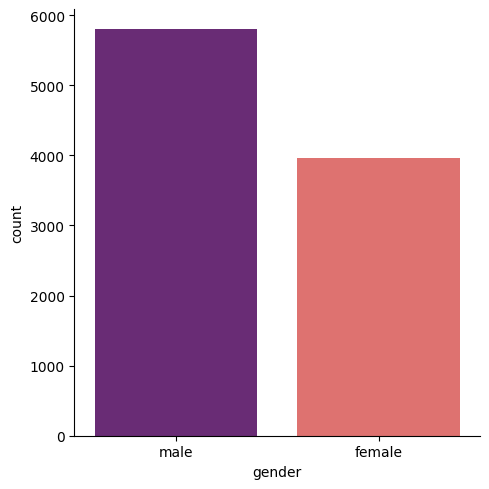

male      4439
female    3093
Name: gender, dtype: int64

In [161]:
#visualisasi gender customer
sns.catplot(
    x='gender',
    kind = 'count',
    palette = 'magma',
    data = customer
            )
plt.show()
cust_order_vendor['gender'].value_counts()

In [162]:
#mencari rata-rata customer
rata_rata_usia = cust_order_vendor['age'].mean()
print(f'rata-rata usia customer adalah {round(rata_rata_usia)} tahun')

rata-rata usia customer adalah 24 tahun


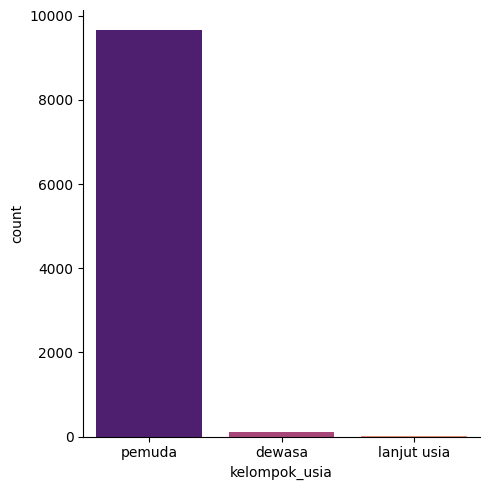

pemuda         8095
dewasa          103
lanjut usia       6
Name: kelompok_usia, dtype: int64

In [163]:
#visualisasi kelompok usia customer 
sns.catplot(
    x='kelompok_usia',
    kind = 'count',
    palette = 'magma',
    data = customer
            )
plt.show()
cust_order['kelompok_usia'].value_counts()

In [164]:
#perbaikan data sedikit
ganti = ['created_at_x','updated_at_x','created_at_y','updated_at_y','created_at']
for i in ganti:
  cust_order_vendor[i] = pd.to_datetime(cust_order_vendor[i])

In [165]:
cust_order_vendor['vendor_id'] = cust_order_vendor['vendor_id'].astype(str)
cust_order_vendor['authentication_id'] = cust_order_vendor['authentication_id'].astype(str)
data_orders['item_count'] = data_orders['item_count'].astype(int)

<ipython-input-165-99a5c3ecd7db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['item_count'] = data_orders['item_count'].astype(int)


In [166]:
# memisahkan koma di vendor tag
cust_order_vendor1 = cust_order_vendor.copy()
cust_order_vendor1['vendor_tag'] = cust_order_vendor1['vendor_tag'].str.split(',')
cust_order_vendor1['vendor_tag_name'] = cust_order_vendor1['vendor_tag_name'].str.split(',')

In [167]:
cust_order_vendor1= cust_order_vendor1.explode(['vendor_tag','vendor_tag_name'])

In [168]:
cust_order_vendor1= cust_order_vendor1.reset_index()

In [173]:
#mencari vendor yang mendapatkan rating rendah
low_rating_vendor =vendor.sort_values('vendor_rating', ascending=True)
low_rating_vendor[['vendor_id','prepration_time','vendor_rating']].head()
#diambil yang memiliki rating paling rendah yakni yang tidak sampai 4

,vendor_id,prepration_time,vendor_rating
30,145,10,3.2
59,274,45,3.7
39,180,15,3.8
15,81,15,3.8
48,201,12,4.0


## 8. Rekomendasi

Recommendations : 
1. Untuk Problem kasus Pertama dan ketiga, pelayan dapat menawarkan 3 product unggulan rekomendasi kepada customer
2. Lalu untuk vendor yang memiliki rating yang buruk perlu diadakan pengecekan apa yang menyebabkan vendor memiliki rating yang rendah 
3. Pengumpulan data perlu di perlengkap terutama di bagian lokasi, karena pada data lokasi tidak ada nama kota atau alamat yang jelas dimana tempat tinggal customer atau vendor berada



In [170]:
# export to excel
cust_order_vendor.to_excel(path + 'cust_order_vendor2.xlsx')
cust_order.to_excel(path + 'cust_order.xlsx')
cust_order_vendor1.to_excel(path + 'cust_order_vendortyr.xlsx')

## 9. Kesimpulan - Create the story